In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (16, 9)
legend_fontsize = 16

from matplotlib import rc
#rc('font',**{'family':'sans-serif'})
#rc('text', usetex=True)
#rc('text.latex',preamble=r'\usepackage[utf8]{inputenc}')
#rc('text.latex',preamble=r'\usepackage[russian]{babel}')
#rc('figure', **{'dpi': 300})

# Пример с тестом на коронавирус

Апостериорная вероятность после положительного теста: 0.161017
Апостериорная вероятность после отрицательного теста: 0.000531


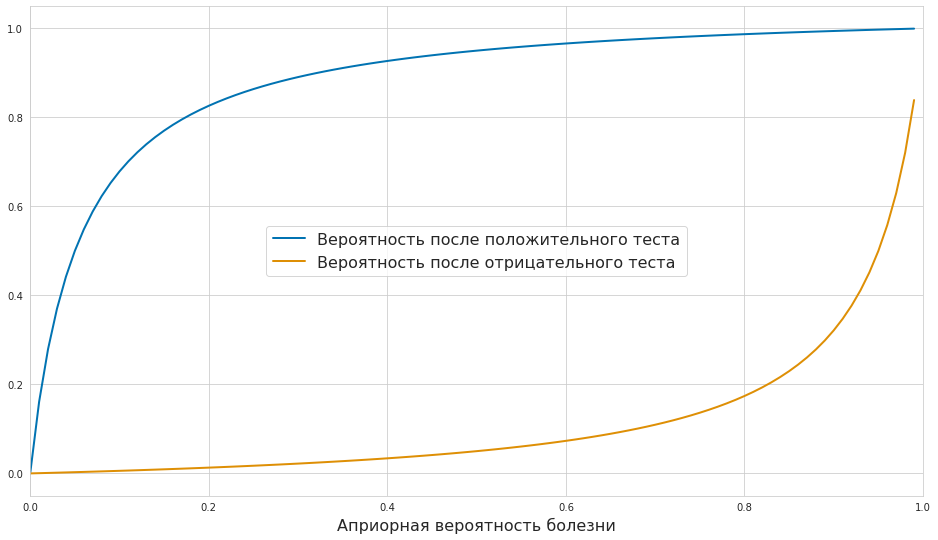

In [5]:
## если data = 1, тест положительный
def compute_posterior(data, prior_prob=0.01, test_success=0.95):
    if data == 1:
        return (prior_prob * test_success) / (prior_prob * test_success + (1-prior_prob) * (1-test_success))
    elif data == 0:
        return (prior_prob * (1-test_success)) / (prior_prob * (1-test_success) + (1-prior_prob) * test_success)
    else:
        return None

print("Апостериорная вероятность после положительного теста: %.6f" % compute_posterior(1) )
print("Апостериорная вероятность после отрицательного теста: %.6f" % compute_posterior(0) )

vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'test_success'])
xs = np.arange(0, 1, 0.01)
ys_one = vector_posterior(1, prior_prob=xs)
ys_zero = vector_posterior(0, prior_prob=xs)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_one, linewidth=2, label=r'Вероятность после положительного теста')
ax.plot(xs, ys_zero, linewidth=2, label='Вероятность после отрицательного теста')
ax.set_xlim((0.0, 1))
ax.set_xlabel('Априорная вероятность болезни', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
# fig.savefig('intro1.pdf', bbox_inches='tight')
plt.show()

# Байесовский вывод для испытаний Бернулли

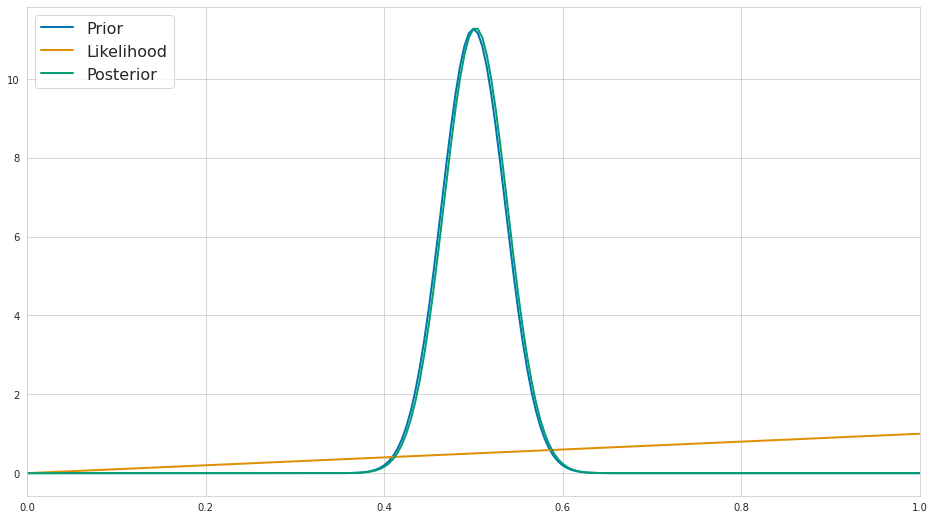

In [18]:
xs = np.arange(-0.01, 1.01, 0.005)

prior_params = (100., 100.)
experimental_data = (1, 0)

## Априорное распределение
pri = st.beta(prior_params[0], prior_params[1]).pdf
norm_prior = 1 #integrate.quad(lambda x: pri(x), -np.inf, np.inf)[0]
ys_prior = [ pri(x) / norm_prior for x in xs ]

## Правдоподобие
n_heads, n_tails = experimental_data
lk = lambda x : x ** n_heads * (1 - x) ** n_tails
ys_like = [ lk(x) for x in xs ]

## Апостериорное распределение
post = lambda x : lk(x) * pri(x)
norm_post = integrate.quad(lambda x: post(x), 0, 1)[0]
ys_post = [ post(x) / norm_post for x in xs ]

## И нарисуем
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_prior, linewidth=2, label="Prior")
ax.plot(xs, ys_like, linewidth=2, label="Likelihood")
ax.plot(xs, ys_post, linewidth=2, label="Posterior")
ax.set_xlim((-.0, 1.0))
ax.legend(loc="upper left", fontsize=legend_fontsize)
plt.show()